In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor, KNeighborsRegressor
from sklearn.neural_network import MLPRegressor 
from sklearn.linear_model import RidgeCV, LassoCV
!pip install lightgbm
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


## Missing Value

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df = df[df['total_bedrooms'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## Data Visualization

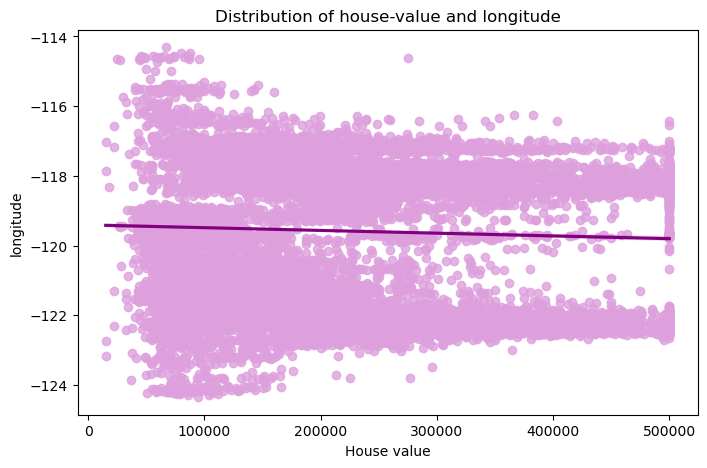

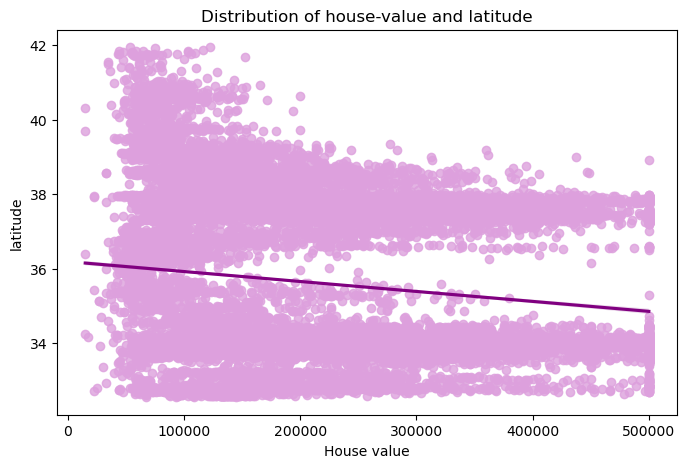

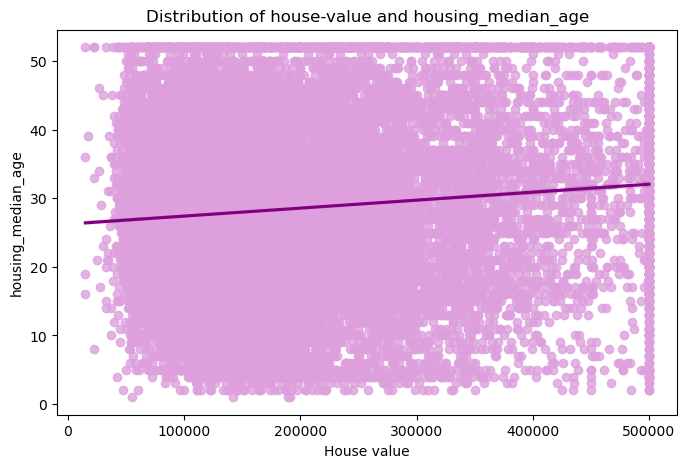

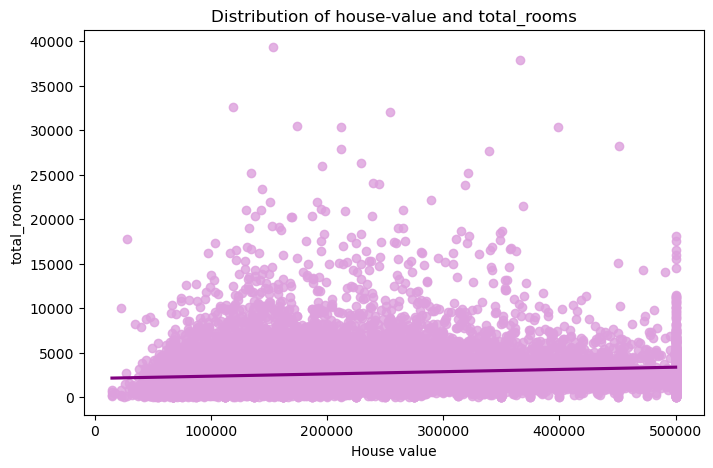

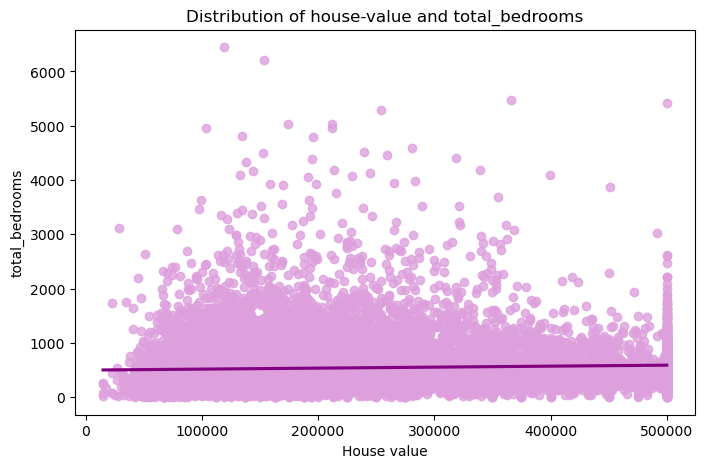

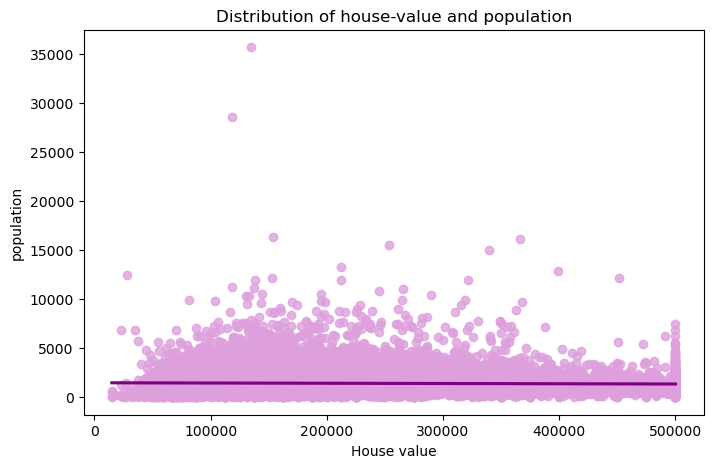

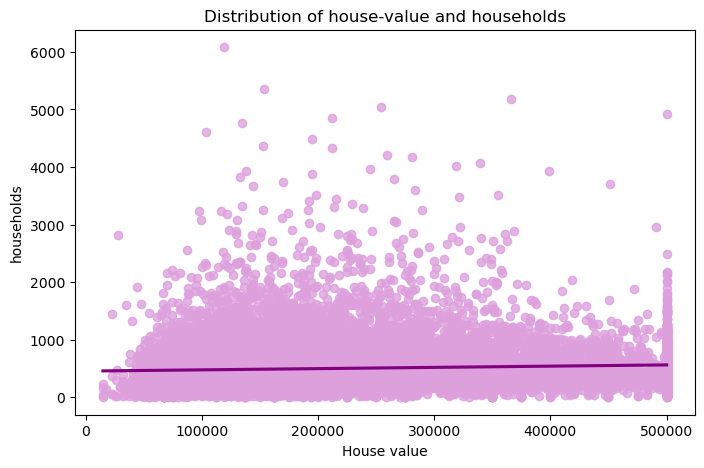

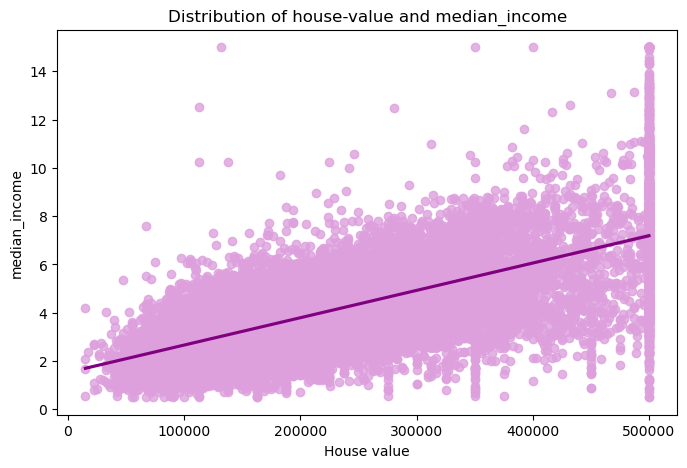

In [9]:
for col in df.columns[:8]:
    plt.figure(figsize=(8, 5))
    sns.regplot(x="median_house_value", y=col, data=df, scatter_kws={"color": "plum"}, line_kws={"color": "purple"})
    plt.xlabel("House value")
    plt.ylabel(f"{col}")
    plt.title(f"Distribution of house-value and {col}")
    plt.show()


<Axes: >

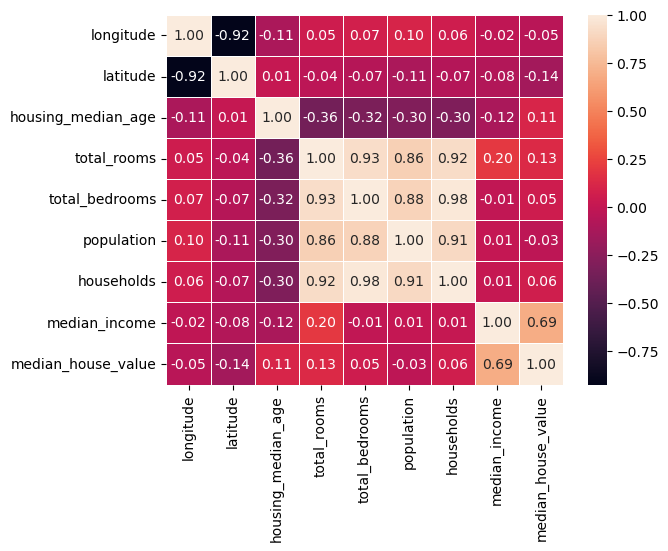

In [10]:
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, fmt=".2f", linewidths=0.5 )

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64


<BarContainer object of 5 artists>

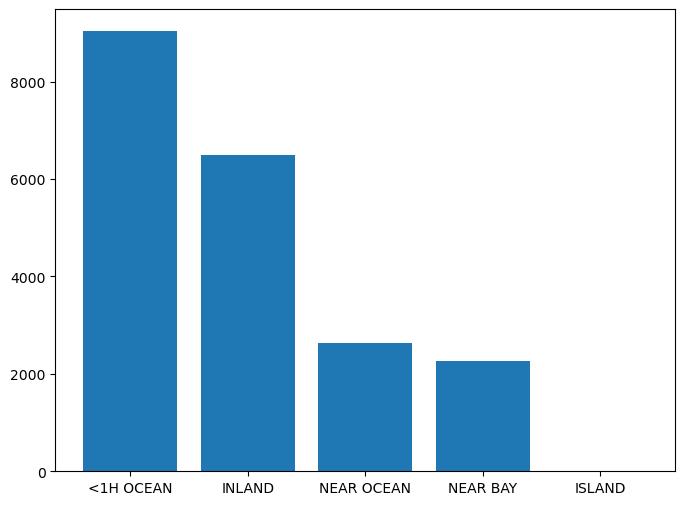

In [11]:
ocean_proximity = df["ocean_proximity"].value_counts()
print(ocean_proximity)
plt.figure(figsize = (8,6))
plt.bar(ocean_proximity.index , ocean_proximity.values)

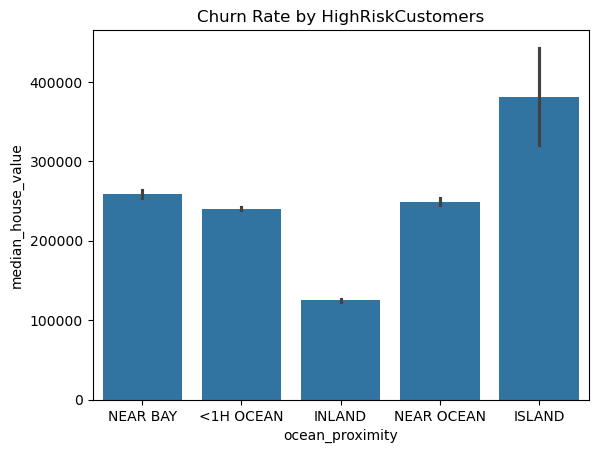

In [12]:
sns.barplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('Churn Rate by HighRiskCustomers')
plt.show()

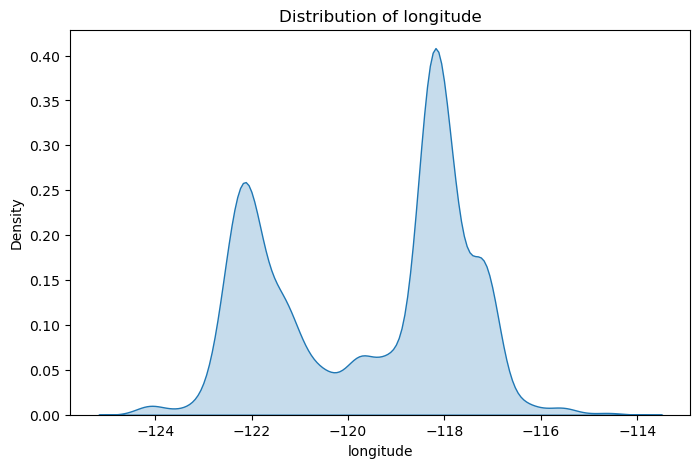

col skewness: -0.2961409005750841


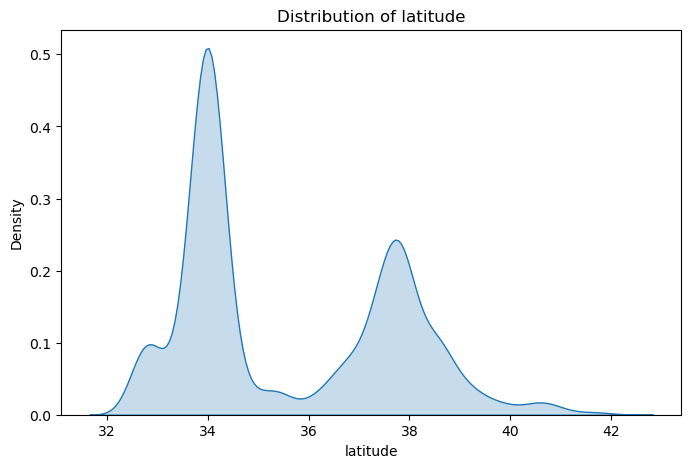

col skewness: 0.4649342770118454


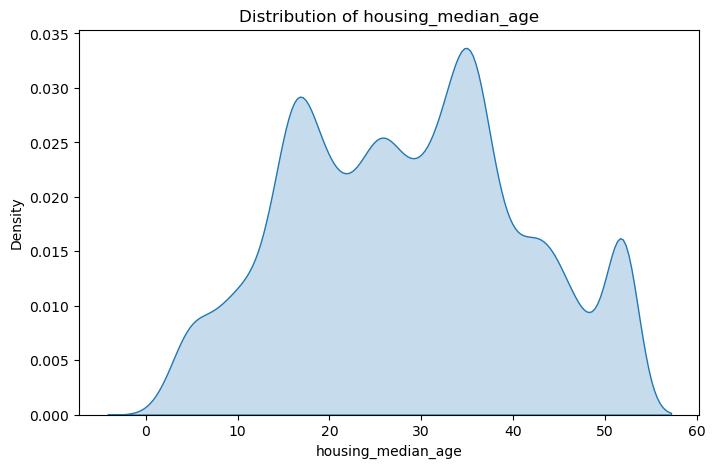

col skewness: 0.06160542582986426


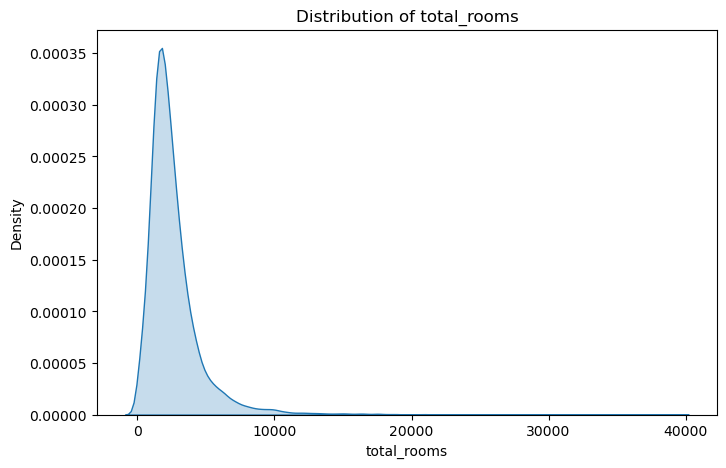

col skewness: 4.15881642276731


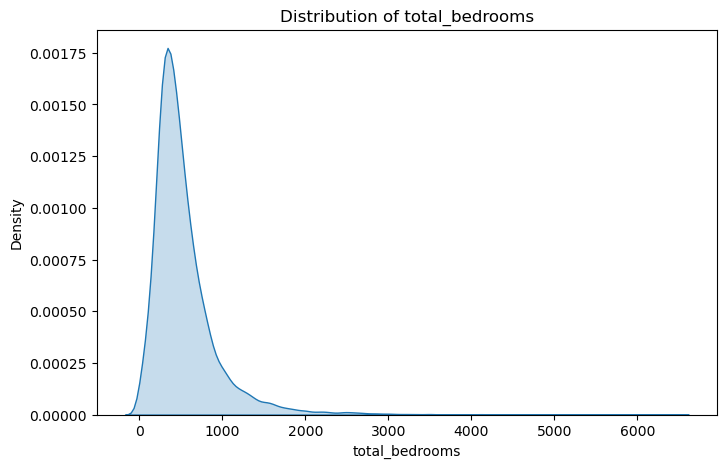

col skewness: 3.4595463315233417


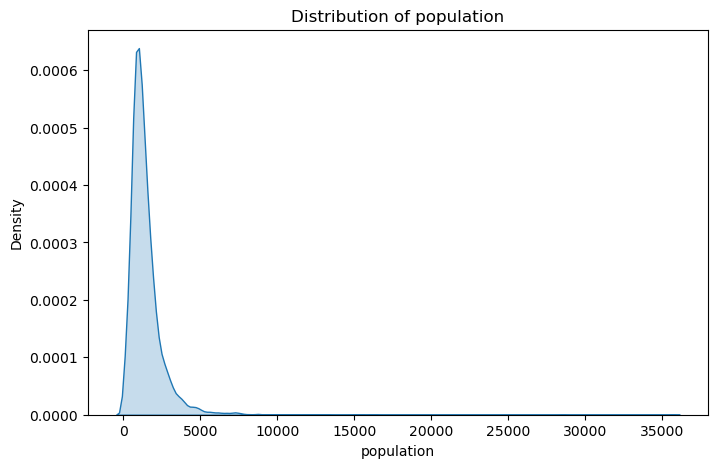

col skewness: 4.96001654238539


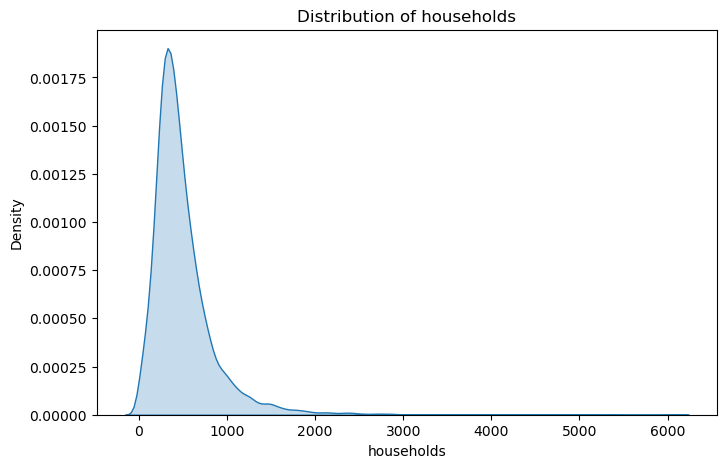

col skewness: 3.413850191065247


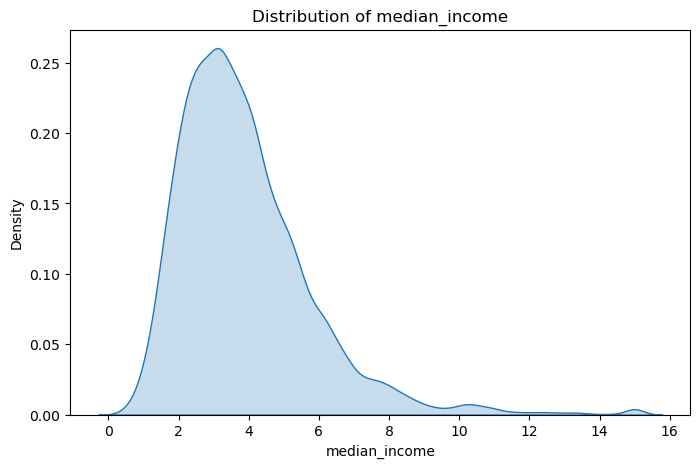

col skewness: 1.6445569163060263


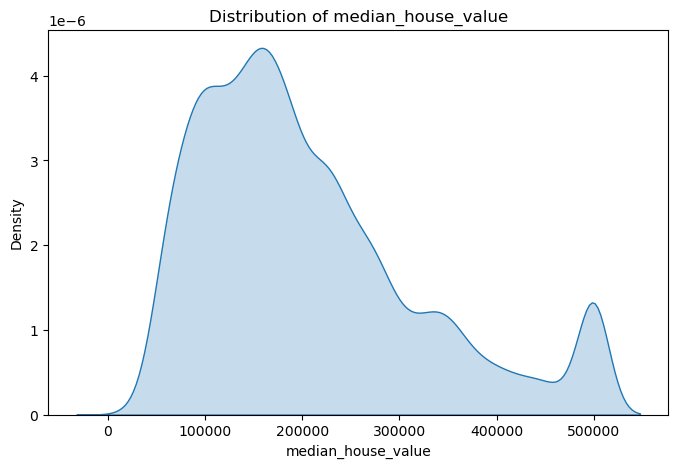

col skewness: 0.9782898908925552


In [13]:
for col in df.columns[:9]:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[col],fill=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    print(f"col skewness: {df[col].skew()}")


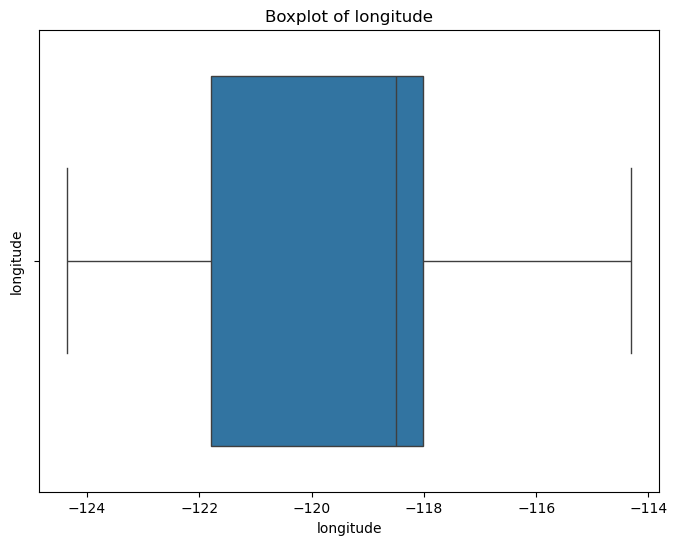

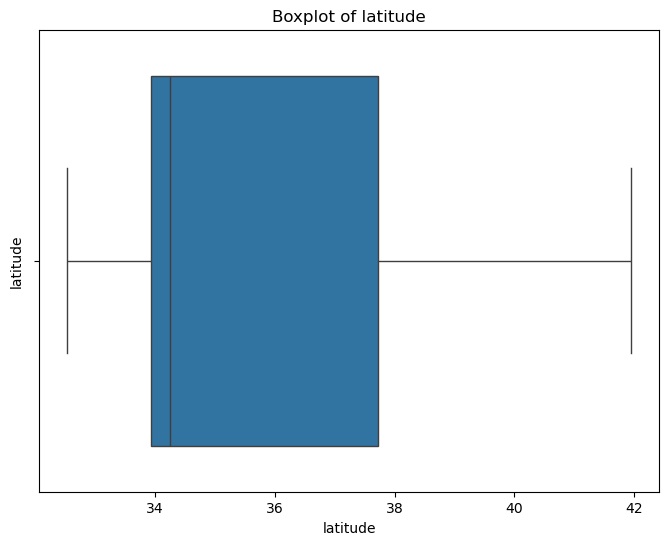

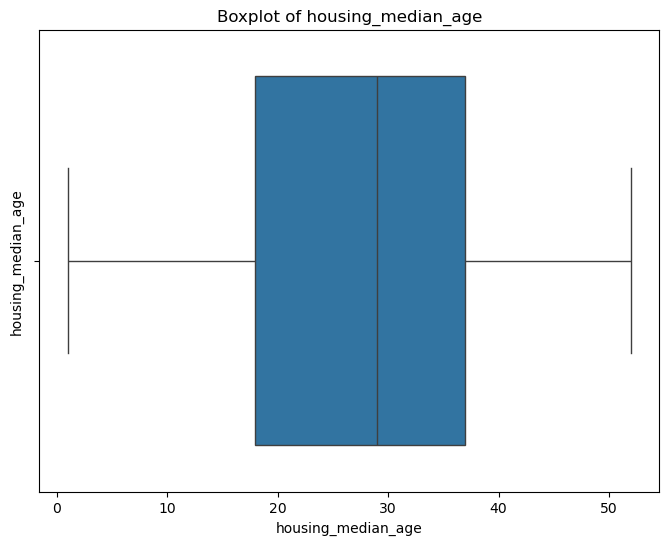

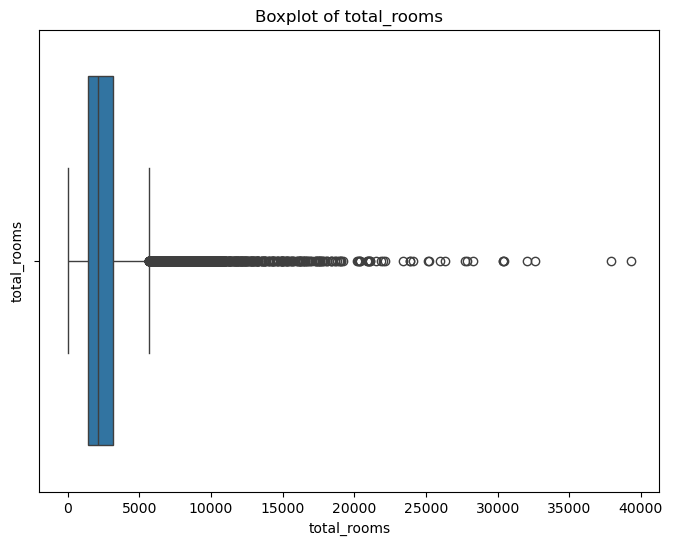

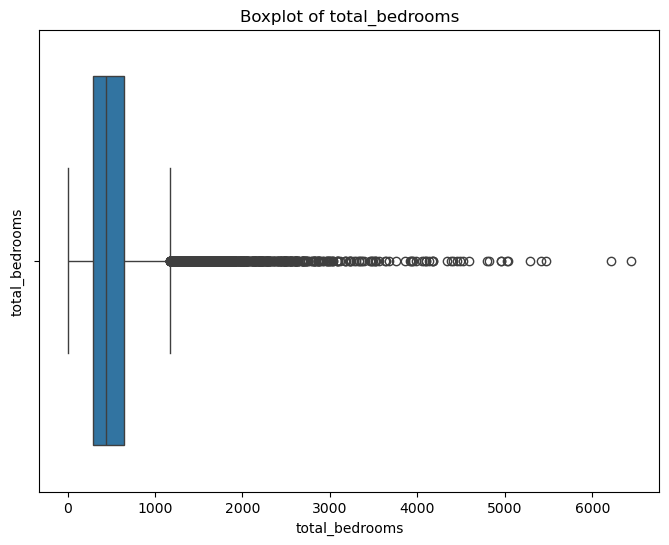

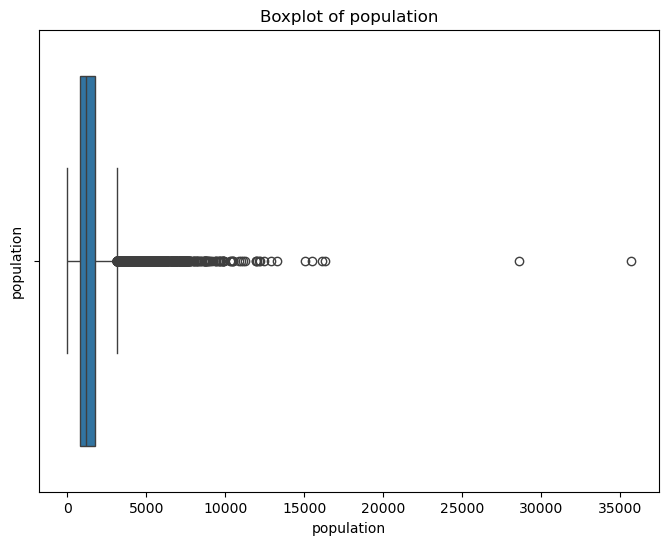

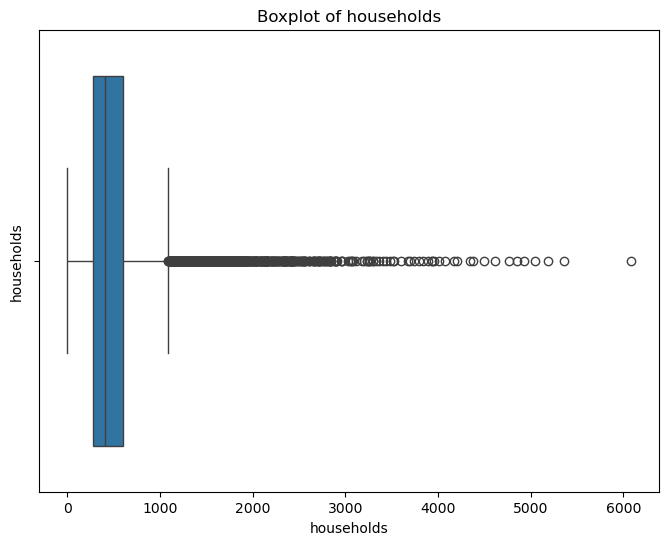

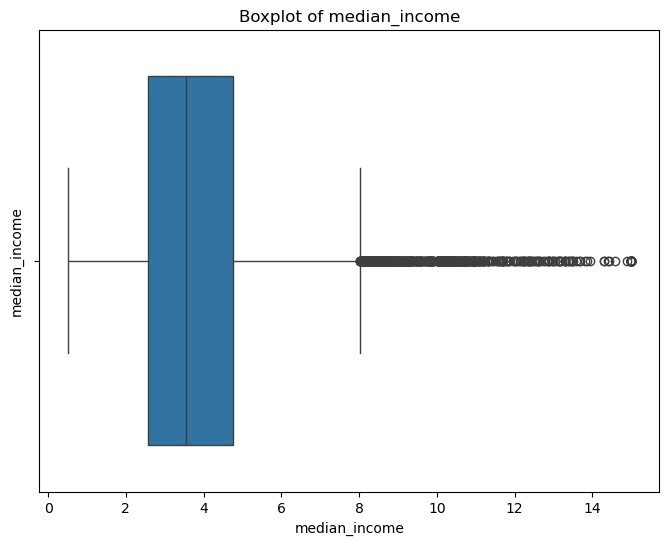

In [14]:
for col in df.columns[:8]:
    plt.figure(figsize = (8,6))
    sns.boxplot (x = df[col])
    plt.ylabel(col)
    plt.title(f"Boxplot of {col}") 
    plt.show()

## Outliers

In [15]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
columns_to_check = ["total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]

for col in columns_to_check:
    df = remove_outliers(df, col)

df.shape

(16724, 10)

## Encoding

In [16]:
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True,  dtype='int')
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [17]:
y= df["median_house_value"]
X= df.drop("median_house_value", axis=1)
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state =42)

## Scaling

In [18]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  

## Modeling

In [19]:
ridge_params = [0.1, 1, 10, 100]

ridge = RidgeCV(alphas = ridge_params, cv=10,  scoring ="neg_mean_squared_error")
ridge.fit(X_train_scaled, y_train)

ridge_tuned = Ridge(alpha= ridge.alpha_).fit(X_train_scaled, y_train)
y_pred= ridge_tuned.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2_score_lin = r2_score(y_test, y_pred)

print(f"MSE:{mse} ,RMSE:{np.sqrt(mse)} R2: {r2_score_lin}")
error_percentage = (np.sqrt(mse) / y_test.mean()) * 100
print(error_percentage)

MSE:3228851265.327309 ,RMSE:56822.98184121728 R2: 0.622542535254986
30.5403300545078


In [20]:
lasso_params = 10**np.linspace(10,-2,200)*0.5
lasso = LassoCV(alphas = lasso_params, cv=10,  max_iter =10000)

lasso.fit(X_train_scaled, y_train)
lasso_tuned = Lasso(alpha= lasso.alpha_).fit(X_train_scaled, y_train)
y_pred= lasso_tuned.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2_score_lin = r2_score(y_test, y_pred)
print(f"MSE:{mse} ,RMSE:{np.sqrt(mse)} R2: {r2_score_lin}")

MSE:3228855426.1819158 ,RMSE:56823.01845363299 R2: 0.6225420488449591


In [21]:
models = [
    ("LinReg", LinearRegression()),
    ("KNN", KNeighborsRegressor()),
    ("MLP", MLPRegressor()),
    ("LGBM", LGBMRegressor()),
    ("SVR", SVR()),
    ("DecisionTree", DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=5)),
    ("RandomForest", RandomForestRegressor())
]
finalResults = []


for name, model in models:
    model.fit(X_train_scaled, y_train)
    model_result = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, model_result)
    rmse=np.sqrt(mse)
    r2= r2_score(y_test, model_result)
    finalResults.append((name, mse, rmse, r2))
df_results = pd.DataFrame(finalResults, columns=['Model', 'MSE', 'RMSE', 'R²'])
print(df_results)

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1843
[LightGBM] [Info] Number of data points in the train set: 13379, number of used features: 11
[LightGBM] [Info] Start training from score 185144.397788


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


          Model           MSE           RMSE        R²
0        LinReg  3.229048e+09   56824.713351  0.622520
1           KNN  2.787981e+09   52801.338425  0.674081
2           MLP  2.323873e+10  152442.559695 -1.716642
3          LGBM  1.756959e+09   41916.092723  0.794609
4           SVR  8.759943e+09   93594.569508 -0.024050
5  DecisionTree  2.623022e+09   51215.448488  0.693365
6  RandomForest  1.839034e+09   42883.956308  0.785014


In [22]:
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["auto", "sqrt", "log2"]
}

rf_model = RandomForestRegressor(random_state=42)

rf_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)

print("Best Parameters:", rf_grid.best_params_)

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
286 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [23]:
rf_tuned =RandomForestRegressor(**rf_grid.best_params_)
rf_tuned.fit(X_train_scaled, y_train)
y_pred = rf_tuned.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, y_pred)
error_percentage = (rf_rmse / y_test.mean()) * 100
print(f"MSE:{rf_mse} ,RMSE:{rf_rmse} R2: {rf_r2}")
print(error_percentage)

MSE:1872553268.3428657 ,RMSE:43273.00854277254 R2: 0.7810957671359202
23.257701734849643
